# CREDIT CARD DEFAULT PREDICTION

Name: Syed Muhammad Maisam ; Registration Number: 2310691 ; Email: sm23587@essex.ac.uk

## 1.0 - Introduction & Preliminary Analysis

### 1.1 - Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score,auc
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

### 1.2 - Importing the Dataset


In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### 1.3 - Exploratory Data Analysis


Understanding Basic Data Structure:

In [3]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [4]:
df.info()

df[['AGE','LIMIT_BAL', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

df = df.rename(columns={'default.payment.next.month': 'default', 
                        'PAY_0': 'PAY_1'})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Plot For Gender, Age And Sex Against Frequency

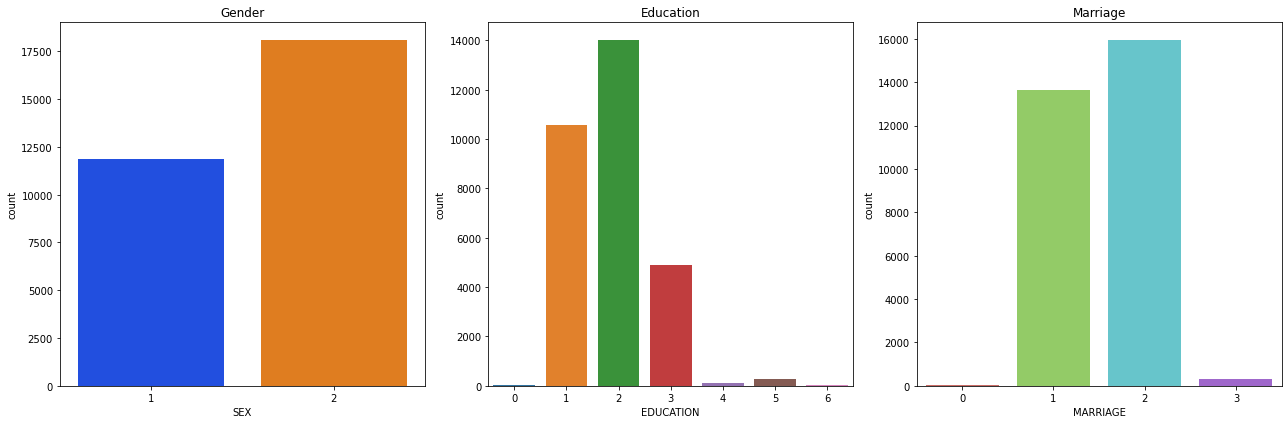

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
sns.countplot(x='SEX', data=df, palette='bright', ax=axes[0])
axes[0].set_title('Gender')
sns.countplot(x='EDUCATION', data=df, palette='tab10', ax=axes[1])
axes[1].set_title('Education')
sns.countplot(x='MARRIAGE', data=df, palette='hls', ax=axes[2])
axes[2].set_title('Marriage')
plt.tight_layout()
plt.show()

Distribution Of Bill Amounts

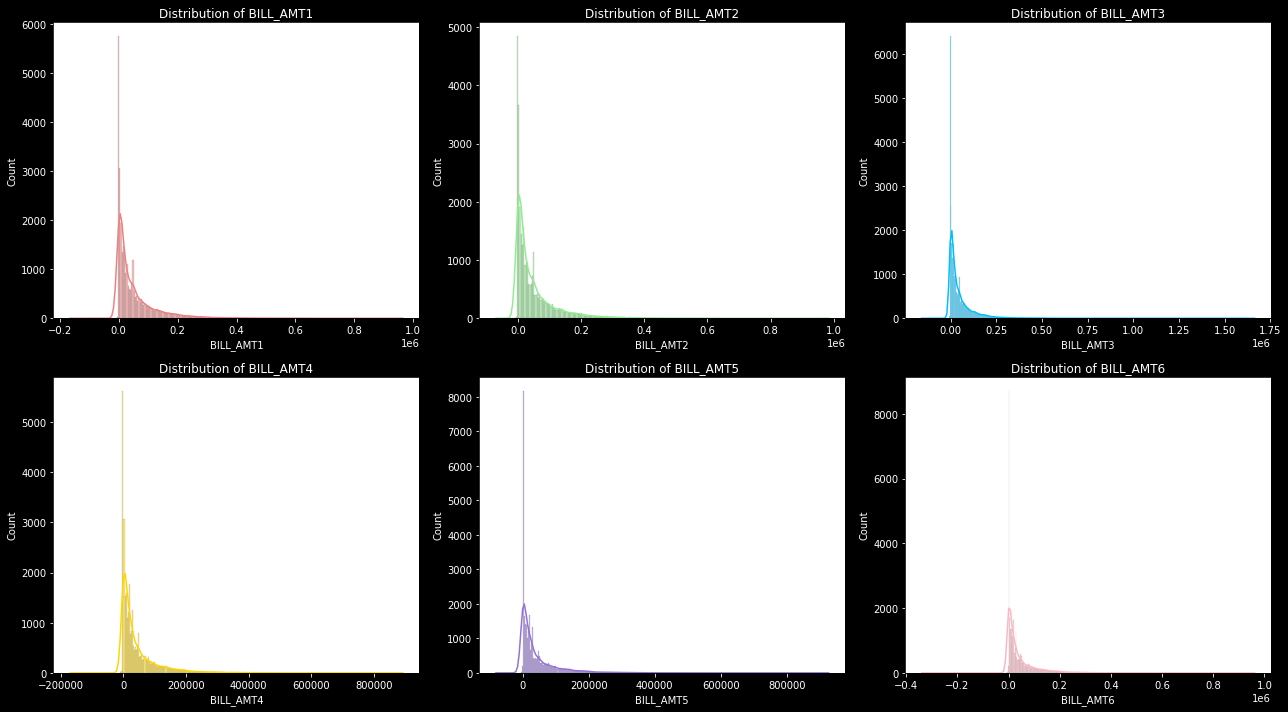

In [5]:
bills = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), facecolor='black')  # Set facecolor to black

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Define bright colors for each bill
colors = ['lightcoral', 'lightgreen', 'deepskyblue', 'gold', 'mediumpurple', 'lightpink']

# Loop through each bill amount column and plot with custom color
for i, (bill_col, color) in enumerate(zip(bills.columns, colors)):
    sns.histplot(bills[bill_col], ax=axes[i], kde=True, color=color)
    axes[i].set_title(f'Distribution of {bill_col}', color='white')  # Set title text color to white

    # Set axis label text color to white
    axes[i].xaxis.label.set_color('white')
    axes[i].yaxis.label.set_color('white')

    # Set ticks color to white
    axes[i].tick_params(axis='both', colors='white')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Distribution Of Repayment Amounts

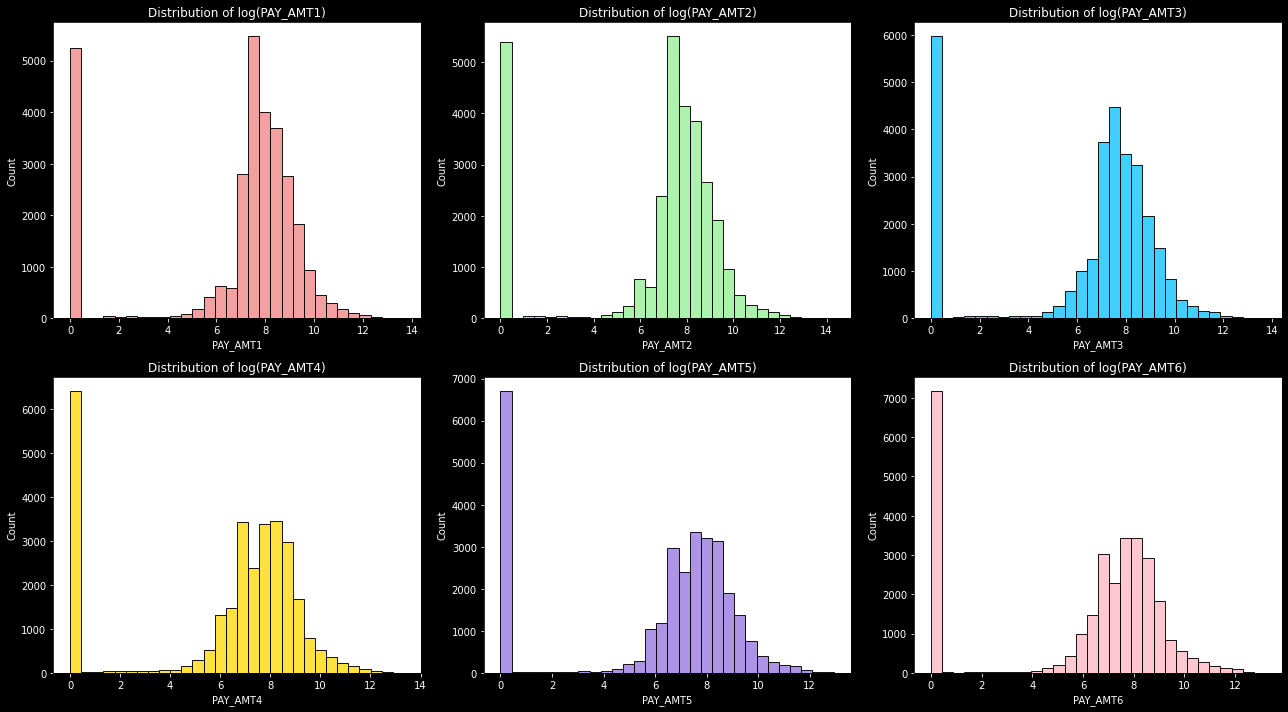

In [6]:
payments = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), facecolor='black')  # Set facecolor to black
axes = axes.flatten()
colors = ['lightcoral', 'lightgreen', 'deepskyblue', 'gold', 'mediumpurple', 'lightpink']
num_bins = 30
for i, (payment_col, color) in enumerate(zip(payments.columns, colors)):
    log_transformed = np.log1p(payments[payment_col])  # Apply log transformation
    sns.histplot(log_transformed, ax=axes[i], kde=False, color=color, bins=num_bins)  # Set kde=False to remove the distribution line
    
    axes[i].set_title(f'Distribution of log({payment_col})', color='white')  # Set title text color to white

    # Set axis label text color to white
    axes[i].xaxis.label.set_color('white')
    axes[i].yaxis.label.set_color('white')

    # Set ticks color to white
    axes[i].tick_params(axis='both', colors='white')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Age And Credit Limits

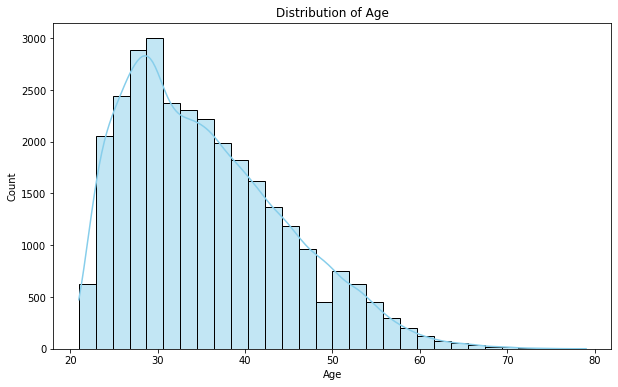

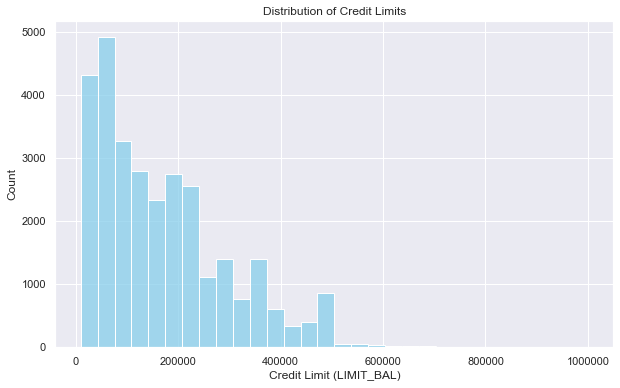

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, color='skyblue', kde=True)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# Show the plot
plt.show()

sns.set(style="darkgrid")

# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['LIMIT_BAL'], bins=30, color='skyblue', kde=False)

# Adding labels and title
plt.xlabel('Credit Limit (LIMIT_BAL)')
plt.ylabel('Count')
plt.title('Distribution of Credit Limits')

# Format x-axis ticks as regular numbers
ax.ticklabel_format(style='plain', axis='x')

# Show the plot
plt.show()


Bill Amounts Against Credit Limit

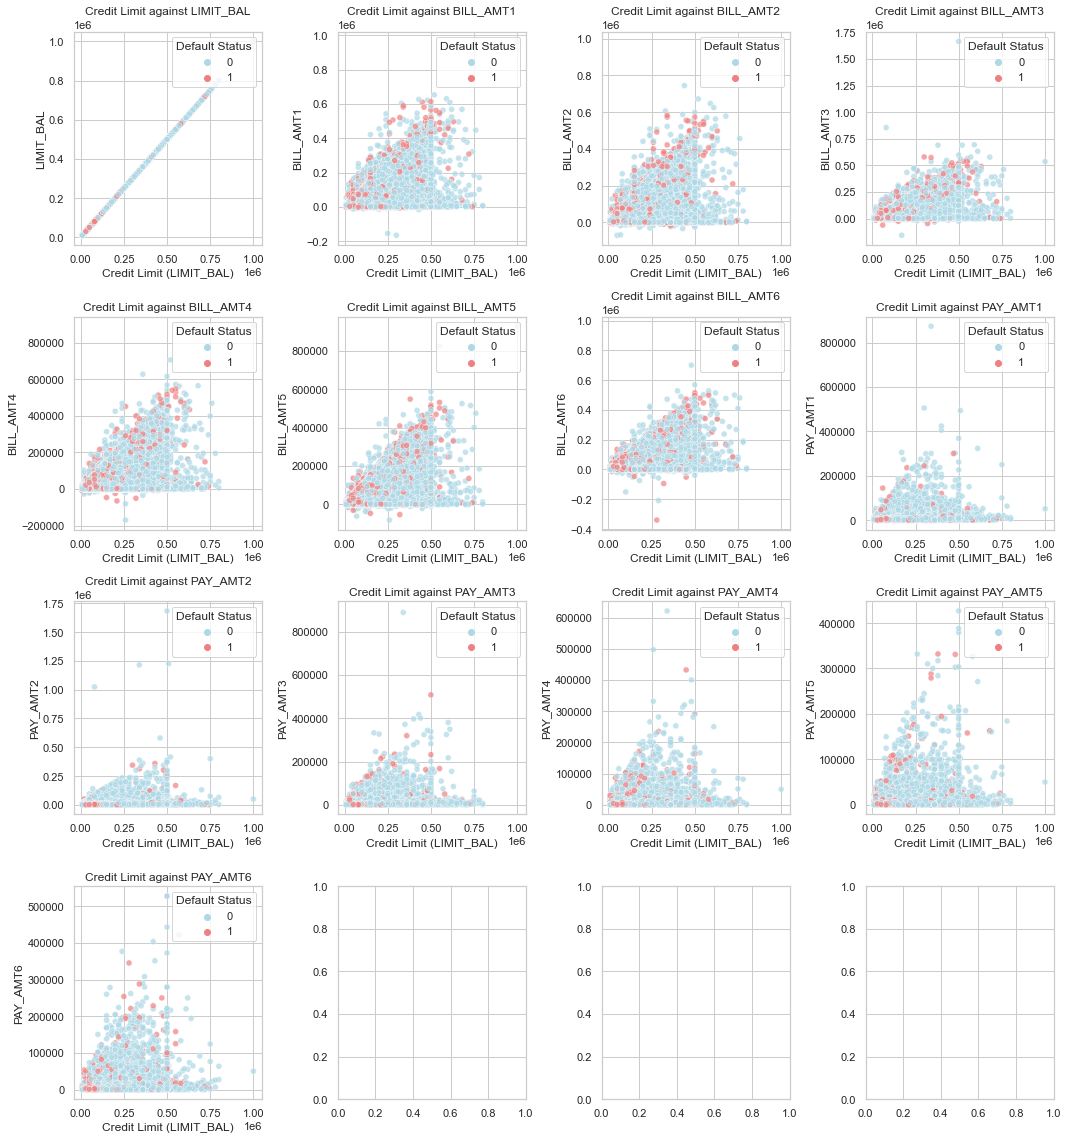

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Select relevant columns for the scatter plots
selected_columns = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Subset the DataFrame with the selected columns
scatter_data = df[selected_columns + ['default']]

# Calculate the number of rows and columns needed based on the number of variables
num_variables = len(selected_columns)
num_rows = math.ceil(num_variables / 4)  # Round up to the nearest integer
num_cols = min(4, num_variables)  # Maximum 4 columns for better layout

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))

# Flatten the axes for easy indexing
axes = axes.flatten()

# Loop through each variable and create a scatter plot
for i, column in enumerate(selected_columns):
    if i < num_variables:  # Ensure not to exceed the number of variables
        sns.scatterplot(x='LIMIT_BAL', y=column, hue='default', data=scatter_data, 
                        palette={0: 'lightblue', 1: 'lightcoral'}, alpha=0.7, ax=axes[i])

        # Add labels and title
        axes[i].set_xlabel('Credit Limit (LIMIT_BAL)')
        axes[i].set_ylabel(column)
        axes[i].set_title(f'Credit Limit against {column}')

        # Show the legend
        axes[i].legend(title='Default Status', loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Target Distribution

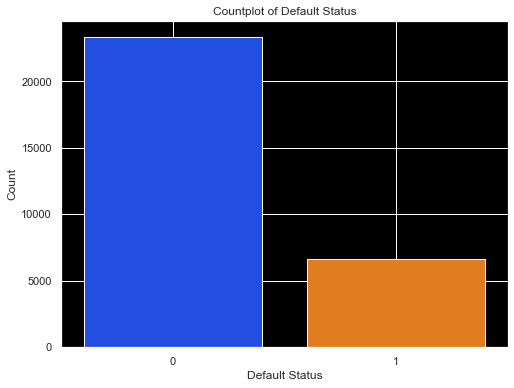

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='default', data=df, palette='bright')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.title('Countplot of Default Status')
plt.gca().set_facecolor('black')
plt.grid(color='white')
plt.show()

### 1.4 - Correlation Matrix

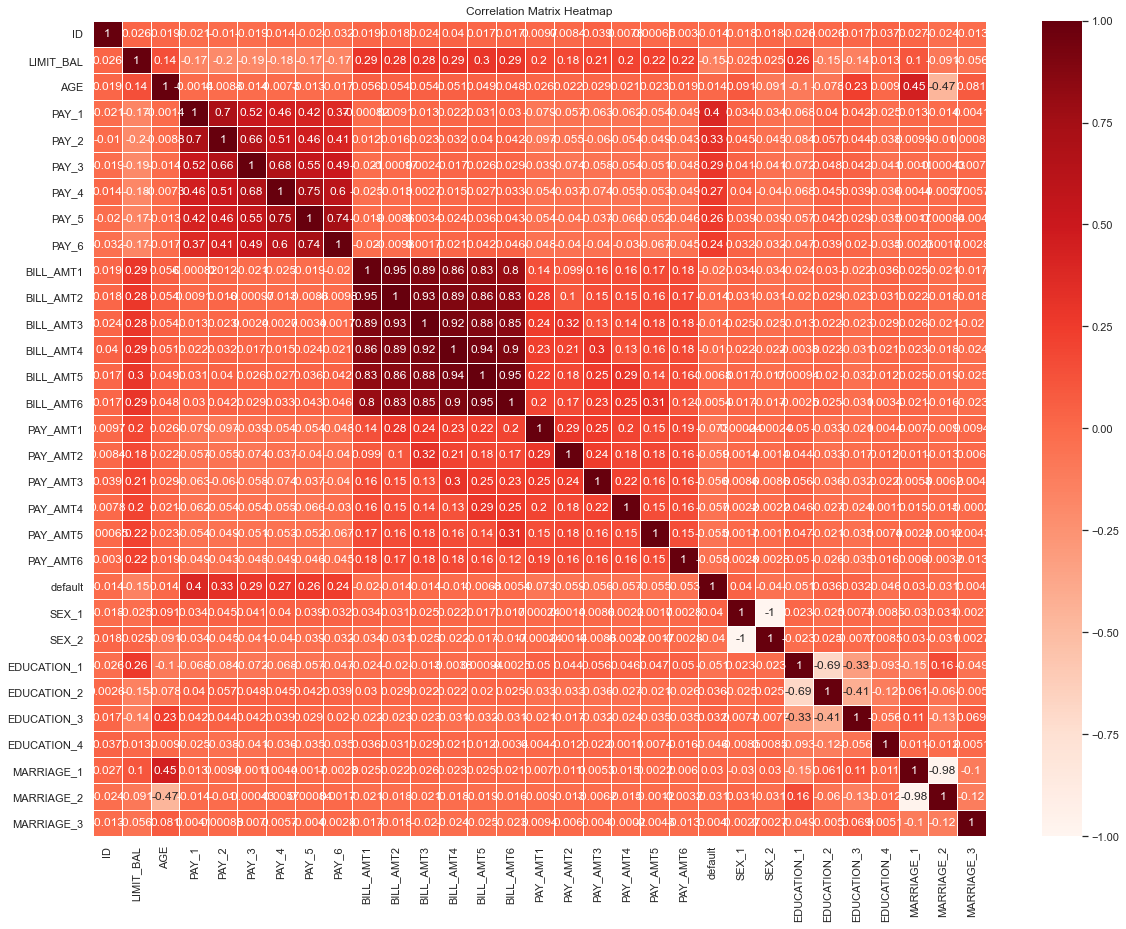

In [32]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Set the style to darkgrid
sns.set(style="darkgrid")

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', linewidths=.5)

# Adding title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

## 2.0 - Feature Engineering

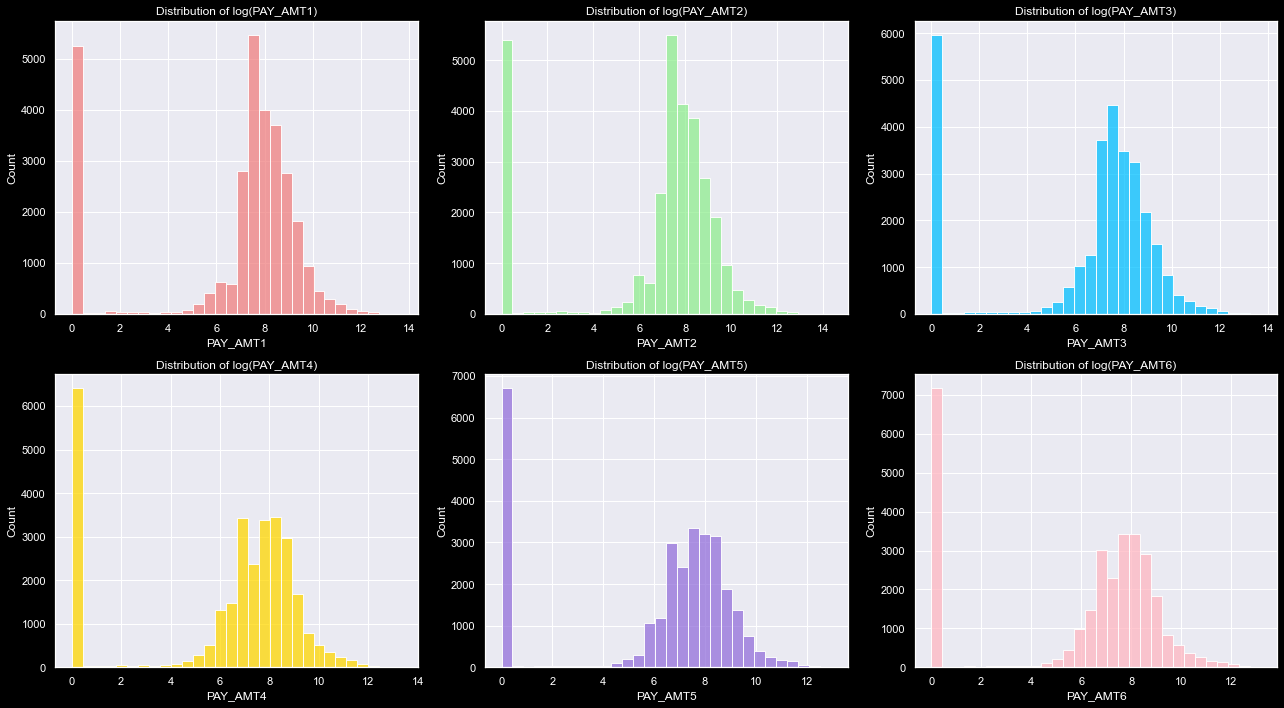

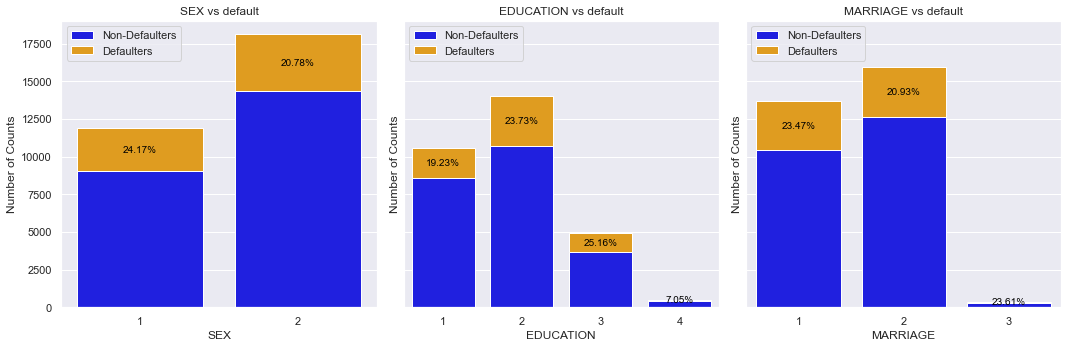

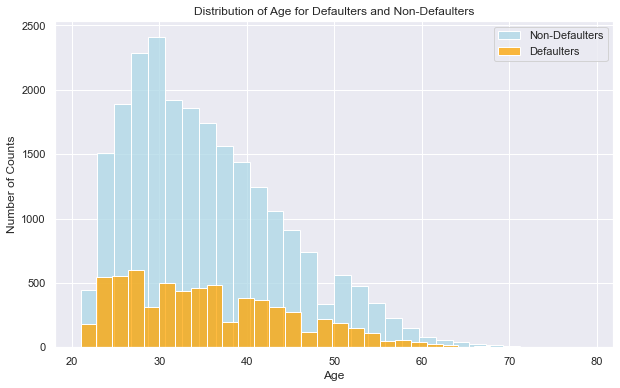

In [12]:
### Setting very small numbers of eductaion to 4
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

### Marriage to 'Other' (thus 3)
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

### -1,-2 and 0 to 0

fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0

payments = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), facecolor='black')  # Set facecolor to black
axes = axes.flatten()
colors = ['lightcoral', 'lightgreen', 'deepskyblue', 'gold', 'mediumpurple', 'lightpink']
num_bins = 30
for i, (payment_col, color) in enumerate(zip(payments.columns, colors)):
    log_transformed = np.log1p(payments[payment_col])  # Apply log transformation
    sns.histplot(log_transformed, ax=axes[i], kde=False, color=color, bins=num_bins)  # Set kde=False to remove the distribution line
    
    axes[i].set_title(f'Distribution of log({payment_col})', color='white')  # Set title text color to white

    # Set axis label text color to white
    axes[i].xaxis.label.set_color('white')
    axes[i].yaxis.label.set_color('white')

    # Set ticks color to white
    axes[i].tick_params(axis='both', colors='white')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Check Variables against defaulters
def cross_subplot(cols, target_col):
    num_cols = len(cols)
    fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(15, 5), sharey=True)

    for i, col in enumerate(cols):
        # Calculate the cross-tabulation
        res = pd.crosstab(df[col], df[target_col])
        res['Percentage'] = round((res[1] / (res[0] + res[1])) * 100, 2)

        # Plotting a stacked bar graph using Seaborn
        sns.barplot(x=res.index, y=res[0], color='blue', label='Non-Defaulters', ax=axes[i])
        sns.barplot(x=res.index, y=res[1], color='orange', label='Defaulters', bottom=res[0], ax=axes[i])

        # Adding percentage labels
        for j, value in enumerate(res['Percentage']):
            axes[i].text(j, res.iloc[j, 0] + res.iloc[j, 1] / 2, f"{value}%", ha='center', va='center', color='black', fontsize=10)

        # Adding labels and title
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Number of Counts')
        axes[i].set_title(f'{col} vs {target_col}')

        # Show the legend with explicit location
        axes[i].legend(loc='upper left')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
cross_subplot(["SEX", "EDUCATION", "MARRIAGE"], "default")


# Modified function for 'AGE'
def age_histogram():
    plt.figure(figsize=(10, 6))

    # Plotting histogram for age counts for defaulters and non-defaulters
    sns.histplot(df[df['default'] == 0]['AGE'], bins=30, color='lightblue', label='Non-Defaulters', kde=False)
    sns.histplot(df[df['default'] == 1]['AGE'], bins=30, color='orange', label='Defaulters', kde=False)

    # Adding labels and title
    plt.xlabel('Age')
    plt.ylabel('Number of Counts')
    plt.title('Distribution of Age for Defaulters and Non-Defaulters')

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage for 'AGE'
age_histogram()


In [13]:
df[['SEX','MARRIAGE','EDUCATION']] = df[['SEX','MARRIAGE','EDUCATION']].astype('object')

## 3.0 - Train - Test Split

In [14]:
# One Hot encoding
df = pd.get_dummies(df)
df.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,default,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,0,0,0,0,3913.0,...,1,0,1,0,1,0,0,1,0,0
1,2,120000.0,26,0,2,0,0,0,2,2682.0,...,1,0,1,0,1,0,0,0,1,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,0,0,1,0,1,0,0,0,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,0,0,1,0,1,0,0,1,0,0
4,5,50000.0,57,0,0,0,0,0,0,8617.0,...,0,1,0,0,1,0,0,1,0,0


In [15]:
X = df.drop(['default','ID'], axis=1)  
y = df['default']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

# Create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)

# Separate majority and minority classes
df_majority = df_train[df_train.default == 0]
df_minority = df_train[df_train.default == 1]
print(df_majority.default.count())
print("-----------")
print(df_minority.default.count())
print("-----------")
print(df_train.default.value_counts())


16355
-----------
4645
-----------
0    16355
1     4645
Name: default, dtype: int64


## 4.0 - SMOTE & Standardization

In [17]:
## !pip install -U threadpoolctl

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

sm = SMOTE(random_state=110)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train_scaled, y_train)

print(len(y_SMOTE))
print(y_SMOTE.sum())


32710
16355


## 5.0 - Building Classification Models 

### 5.1 - KNN Model

In [19]:
# Initialize KNN Classifier
knn_model = KNeighborsClassifier()

# Define hyperparameters grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7],  
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan and Euclidean distance
}

# Train the KNN model on the entire SMOTE training dataset
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_SMOTE, y_SMOTE)
best_knn_model = knn_grid_search.best_estimator_

# Make predictions on the validation set
y_pred_knn = best_knn_model.predict(X_test)

# Calculate classification report for KNN
knn_report_dict = classification_report(y_test, y_pred_knn, output_dict=True)
knn_report_df = pd.DataFrame(knn_report_dict, index=['precision', 'recall', 'f1-score', 'support']).transpose()

# Display the classification report
print("Classification Report for KNN:")
print(knn_report_df)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:")
print(cm)

# Get the best hyperparameters for KNN
print("Best Hyperparameters for KNN:")
print(best_knn_model.get_params())

C:\Users\Maisam\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Classification Report for KNN:
              precision    recall  f1-score      support
0              0.787107  0.961621  0.865656  7009.000000
1              0.384439  0.084380  0.138386  1991.000000
accuracy       0.767556  0.767556  0.767556     0.767556
macro avg      0.585773  0.523000  0.502021  9000.000000
weighted avg   0.698028  0.767556  0.704768  9000.000000
Confusion Matrix for KNN:
[[6740  269]
 [1823  168]]
Best Hyperparameters for KNN:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


### 5.2 - Logistic Regression Model

In [20]:
# Initialize Logistic Regression Classifier
logistic_model = LogisticRegression()

# Define hyperparameters grid for Logistic Regression
logistic_param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithm
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Train the Logistic Regression model on the entire SMOTE training dataset
logistic_grid_search = GridSearchCV(logistic_model, logistic_param_grid, scoring='accuracy', n_jobs=-1)
logistic_grid_search.fit(X_SMOTE, y_SMOTE)
best_logistic_model = logistic_grid_search.best_estimator_

# Make predictions on the validation set
y_pred_logistic = best_logistic_model.predict(X_test)

# Calculate classification report for Logistic Regression
logistic_report_dict = classification_report(y_test, y_pred_logistic, output_dict=True)
logistic_report_df = pd.DataFrame(logistic_report_dict, index=['precision', 'recall', 'f1-score', 'support']).transpose()

# Display the classification report
print("Classification Report for Logistic Regression:")
print(logistic_report_df)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix for Logistic Regression:")
print(cm)

# Get the best hyperparameters for Logistic Regression
print("Best Hyperparameters for Logistic Regression:")
print(best_logistic_model.get_params())

Classification Report for Logistic Regression:
              precision    recall  f1-score      support
0              0.778926  0.999857  0.875672  7009.000000
1              0.666667  0.001005  0.002006  1991.000000
accuracy       0.778889  0.778889  0.778889     0.778889
macro avg      0.722796  0.500431  0.438839  9000.000000
weighted avg   0.754092  0.778889  0.682397  9000.000000
Confusion Matrix for Logistic Regression:
[[7008    1]
 [1989    2]]
Best Hyperparameters for Logistic Regression:
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


C:\Users\Maisam\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### 5.3 - XGBoost

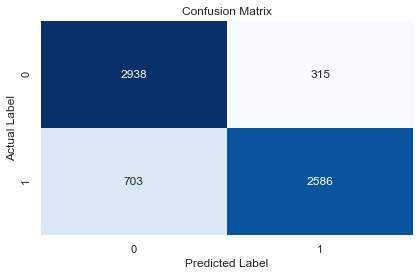

Table of Classification Reports:
              precision    recall  f1-score      support  Fold
0              0.813766  0.898835  0.854188  3262.000000     1
1              0.887717  0.795427  0.839042  3280.000000     1
accuracy       0.846989  0.846989  0.846989     0.846989     1
macro avg      0.850742  0.847131  0.846615  6542.000000     1
weighted avg   0.850843  0.846989  0.846594  6542.000000     1
0              0.813330  0.909146  0.858573  3302.000000     2
1              0.894774  0.787346  0.837629  3240.000000     2
accuracy       0.848823  0.848823  0.848823     0.848823     2
macro avg      0.854052  0.848246  0.848101  6542.000000     2
weighted avg   0.853666  0.848823  0.848200  6542.000000     2
0              0.811368  0.899876  0.853333  3236.000000     3
1              0.890281  0.795221  0.840070  3306.000000     3
accuracy       0.846989  0.846989  0.846989     0.846989     3
macro avg      0.850825  0.847549  0.846702  6542.000000     3
weighted avg   0.85124

In [21]:
# Initialize XGBClassifier
model = XGBClassifier(random_state=110)
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 50, 200]
}

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=110)

# Create an empty DataFrame to store classification reports
classification_reports_df = pd.DataFrame()

# Create subplots for confusion matrices
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

# Iterate over each fold
for i, (train_index, test_index) in enumerate(kf.split(X_SMOTE)):
    X_train_fold, X_val_fold = X_SMOTE[train_index], X_SMOTE[test_index]
    y_train_fold, y_val_fold = y_SMOTE[train_index], y_SMOTE[test_index]

    # Initialize GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_fold, y_train_fold)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val_fold)

    # Calculate classification report
    report_dict = classification_report(y_val_fold, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    report_df["Fold"] = i + 1

    # Append to the main DataFrame
    classification_reports_df = pd.concat([classification_reports_df, report_df])

    # Plot confusion matrix with class labels for the last fold
    if i == kf.get_n_splits() - 1:
        cm = confusion_matrix(y_val_fold, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes, cbar=False,
                    xticklabels=best_model.classes_, yticklabels=best_model.classes_)
        axes.set_title("Confusion Matrix")
        # Set x-axis and y-axis labels
        axes.set_xlabel("Predicted Label")
        axes.set_ylabel("Actual Label")

# Show the plot
plt.tight_layout()
plt.show()

# Display the table of classification reports
print("Table of Classification Reports:")
print(classification_reports_df)

# Calculate mean accuracy for each fold
mean_accuracy_by_fold = classification_reports_df.loc['accuracy'].groupby('Fold').mean()

# Find the fold with the highest mean accuracy
best_fold = mean_accuracy_by_fold.idxmax()

print("Best Fold:", best_fold)
print("Best Hyperparameters:")
print(best_model.get_params())

## 6.0 - Comparison of Models

### 6.1 - ROC Curve

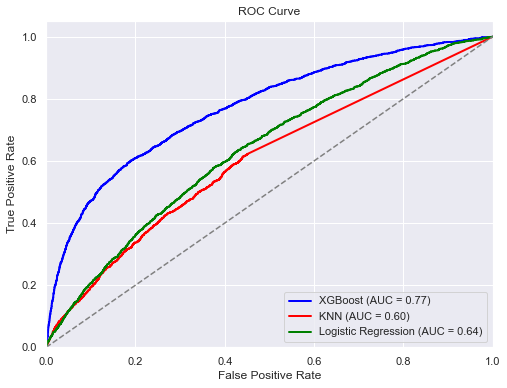

In [22]:
# Fit the XGBoost model
best_model.fit(X_train, y_train)

# Predict probabilities for XGBoost
y_pred_proba_xgb = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Fit the KNN model
best_knn_model.fit(X_train, y_train)

# Predict probabilities for KNN
y_pred_proba_knn = best_knn_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

# Fit the Logistic Regression model
best_logistic_model.fit(X_train, y_train)

# Predict probabilities for Logistic Regression
y_pred_proba_logistic = best_logistic_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for Logistic Regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)
auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_logistic, tpr_logistic, color='green', lw=2, label=f'Logistic Regression (AUC = {auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### 6.2 - Feature Importance Plots

#### XGBoost

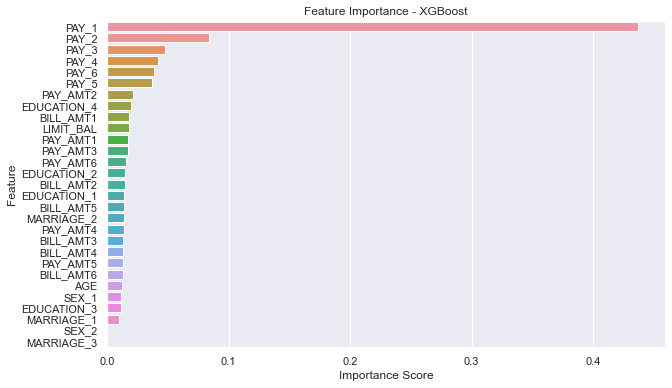

In [23]:
# Extract feature importance from the XGBoost model
importance = best_model.feature_importances_

# Create a DataFrame to hold feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort features by importance score
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

#### Logistic Regression

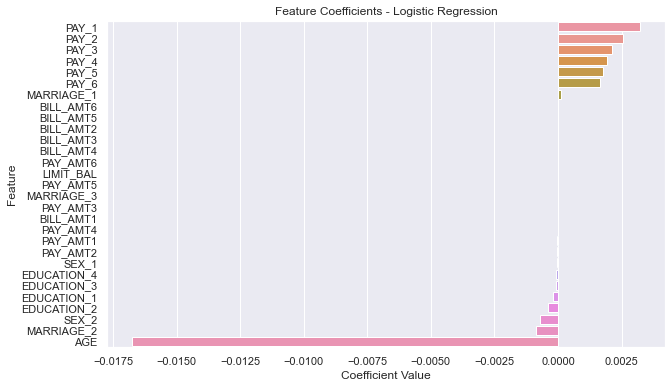

In [24]:
# Extract feature coefficients from the logistic regression model
coefficients = best_logistic_model.coef_[0]

# Create a DataFrame to hold feature names and coefficient values
feature_coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort features by coefficient value
feature_coefficients_df = feature_coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_coefficients_df)
plt.title('Feature Coefficients - Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

#### KNN

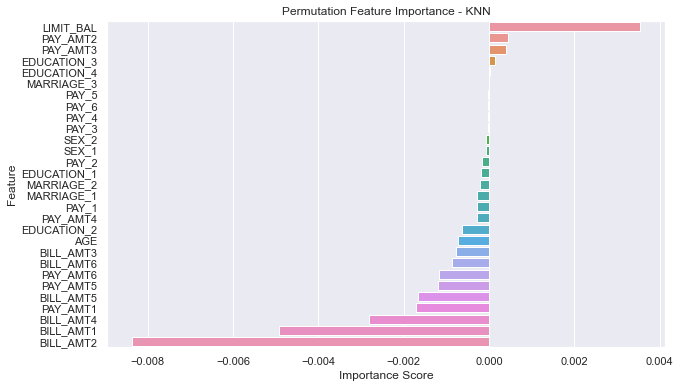

In [25]:
# roc for knn
from sklearn.inspection import permutation_importance

# Compute permutation importances for KNN
result = permutation_importance(best_knn_model, X_test, y_test, n_repeats=4, random_state=110)

# Create a DataFrame to hold feature names and importance scores
feature_importance_df_knn = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})

# Sort features by importance score
feature_importance_df_knn = feature_importance_df_knn.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_knn)
plt.title('Permutation Feature Importance - KNN')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
